In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
# Load dataset
data = pd.read_csv('Google_Stock_Price_Train.csv')
# Remove commas from the 'Close' column and convert it to floats
data['Close'] = data['Close'].str.replace(',', '').astype(float)

prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

prices_scaled = scaler.fit_transform(prices)

In [ ]:
# Split data into training and testing sets
train_size = int(len(prices_scaled) * 0.8)
test_size = len(prices_scaled) - train_size
train_data, test_data = prices_scaled[0:train_size, :], prices_scaled[train_size:len(prices_scaled), :]


In [ ]:
# Function to create dataset for time series prediction
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        X.append(dataset[i:(i + time_steps), 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)


In [ ]:
# Define time steps
time_steps = 60


In [ ]:
# Create training and testing datasets
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape input data to be 3-dimensional [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])



In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 9s 88ms/step - loss: 0.0400
Epoch 2/100
30/30 [==============================] - 4s 132ms/step - loss: 0.0105
Epoch 3/100
30/30 [==============================] - 3s 87ms/step - loss: 0.0094
Epoch 4/100
30/30 [==============================] - 3s 89ms/step - loss: 0.0087
Epoch 5/100
30/30 [==============================] - 3s 88ms/step - loss: 0.0083
Epoch 6/100
30/30 [==============================] - 4s 120ms/step - loss: 0.0070
Epoch 7/100
30/30 [==============================] - 3s 95ms/step - loss: 0.0055
Epoch 8/100
30/30 [==============================] - 3s 88ms/step - loss: 0.0063
Epoch 9/100
30/30 [==============================] - 3s 89ms/step - loss: 0.0047
Epoch 10/100
30/30 [==============================] - 3s 92ms/step - loss: 0.0049
Epoch 11/100
30/30 [==============================] - 4s 140ms/step - loss: 0.0061
Epoch 12/100
30/30 [==============================] - 3s 90ms/step - loss: 0.0048
Epoch 13/100
30/30 [==

In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)



6/6 [==============================] - 1s 31ms/step


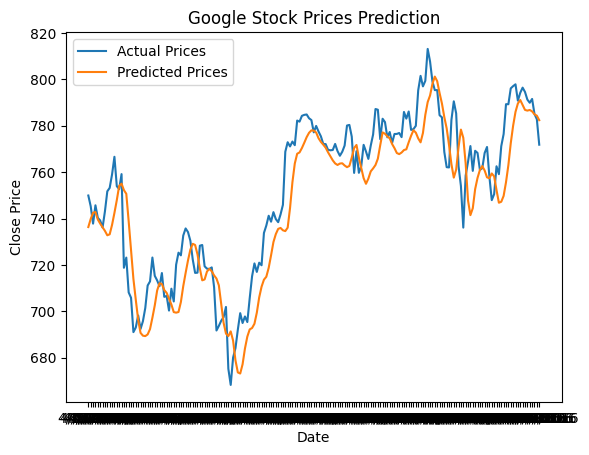

In [ ]:
# Visualize the results
plt.plot(data['Date'][-len(predictions):], data['Close'][-len(predictions):], label='Actual Prices')
plt.plot(data['Date'][-len(predictions):], predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google Stock Prices Prediction')
plt.legend()
plt.show()